In [1]:
import sys
import os
#sys.path.append("fashion-clip/")
from fashion_clip.fashion_clip import FashionCLIP
import pandas as pd
import numpy as np
from collections import Counter
from PIL import Image
import numpy as np

/home/cat/.env/tf_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-08-06 16:16:49.929254: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-06 16:16:50.006594: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-06 16:16:50.867918: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
fclip = FashionCLIP('fashion-clip')

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [3]:
category = "Knits & Hoodies"
import glob
images = glob.glob("/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear_not_in_db/"+category+"/*.jpg")


In [4]:
len(images)

638

In [5]:
# tested on 100 images
# can change that number
images_subset = images[:100]

In [6]:
# we create image embeddings and text embeddings
image_embeddings = fclip.encode_images(images_subset, batch_size=32)

# we normalize the embeddings to unit norm (so that we can use dot product instead of cosine similarity to do comparisons)
image_embeddings = image_embeddings/np.linalg.norm(image_embeddings, ord=2, axis=-1, keepdims=True)

4it [00:01,  2.03it/s]                       


In [7]:
import joblib
design_clf = joblib.load('model_design_clf.joblib')
material_clf = joblib.load('model_material_clf.joblib')
fastener_clf = joblib.load('model_fastener_clf.joblib')
sleeves_clf = joblib.load('model_sleeves_clf.joblib')
neck_clf = joblib.load('model_neck_clf.joblib')
front_opening_clf = joblib.load('model_front_opening_clf.joblib')
length_clf = joblib.load('model_length_clf.joblib')
fit_clf = joblib.load('model_fit_clf.joblib')
hood_clf = joblib.load('model_hood_clf.joblib')
subcategory_clf = joblib.load('model_subcategory_clf.joblib')

In [8]:
df = pd.DataFrame(columns=["category", "subcategory", "img", "fit", "length", "front_opening", "neck", "sleeves", "hood", "fastener", "material", "design", "embeddings"])

In [9]:
from IPython.display import display

fixed_height = 324
for ind, img in enumerate(images_subset):
    image = Image.open(img)
    height_percent = (fixed_height / float(image.size[1]))
    width_size = int((float(image.size[0]) * float(height_percent)))
    image = image.resize((width_size, fixed_height), Image.NEAREST)
    fit = fit_clf.predict([image_embeddings[ind]])
    length = length_clf.predict([image_embeddings[ind]])
    front_opening = front_opening_clf.predict([image_embeddings[ind]])
    neck = neck_clf.predict([image_embeddings[ind]])
    sleeves = sleeves_clf.predict([image_embeddings[ind]])
    hood = hood_clf.predict([image_embeddings[ind]])
    fastener = fastener_clf.predict([image_embeddings[ind]])
    material = material_clf.predict([image_embeddings[ind]])
    design = design_clf.predict([image_embeddings[ind]])
    subcategory = subcategory_clf.predict([image_embeddings[ind]])
    # print(ind, subcategory[0], fit, length, front_opening, neck, sleeves, fastener, material, design)
    df.loc[len(df)] = [category, subcategory[0], img, fit[0], "Hip Length", front_opening[0], neck[0], sleeves[0], hood[0], fastener[0], material[0], design[0], image_embeddings[ind].tolist()]
    # display(image)

In [10]:
df

,category,subcategory,img,fit,length,front_opening,neck,sleeves,hood,fastener,material,design,embeddings
0,Knits & Hoodies,Sweatshirt,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,False,Crew Neck,Long Sleeve,False,No Buttons,mid knit,nan,"[-0.07384515553712845, -0.040941718965768814, ..."
1,Knits & Hoodies,Cardigan,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,False,Mock Neck,Long Sleeve,False,Zipper,mid knit,nan,"[-0.009685416705906391, -0.0033866367302834988..."
2,Knits & Hoodies,Sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,False,Turtleneck,Long Sleeve,False,No Buttons,heavy knit,nan,"[-0.025594964623451233, -0.044936422258615494,..."
3,Knits & Hoodies,Pullover Hoodie,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,False,Crew Neck,Long Sleeve,True,No Buttons,mid knit,nan,"[-0.019788675010204315, -0.07425800710916519, ..."
4,Knits & Hoodies,Turtleneck Sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,False,Turtleneck,Long Sleeve,False,Zipper,mid knit,nan,"[-0.015530047938227654, -0.042417366057634354,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Knits & Hoodies,Zip Hoodie,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,True,Mock Neck,Long Sleeve,True,Zipper,mid knit,nan,"[0.02589457854628563, -0.21064017713069916, -0..."
96,Knits & Hoodies,Pullover Hoodie,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,False,Crew Neck,Long Sleeve,True,No Buttons,mid knit,nan,"[-0.0028982607182115316, -0.19235201179981232,..."
97,Knits & Hoodies,Pullover Hoodie,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,False,Crew Neck,Sleeveless,True,No Buttons,mid knit,nan,"[-0.011992202140390873, 0.06360355019569397, 0..."
98,Knits & Hoodies,Pullover Hoodie,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,False,Crew Neck,Long Sleeve,True,No Buttons,mid knit,nan,"[0.015197545289993286, -0.13851042091846466, 0..."


In [60]:
count = df["subcategory"].value_counts()
count

subcategory
Pullover Hoodie           45
Sweatshirt                12
V-Neck Sweater             8
Turtleneck Sweater         7
Sweater                    6
V-Neck Cardigan            4
Single-Breasted Blazer     3
Open Cowl Neck Sweater     2
Cropped Blazer             2
Zipped Sweatshirt          2
Zip Hoodie                 2
Tunic Shirt                1
Name: count, dtype: int64

In [ ]:
# Sweatshirt Cardigan Sweater Pullover Hoodie Zip Hoodie V-Neck Cardigan V-Neck Sweater Zipped Sweatshirt Tunic Shirt 
# not: Turtleneck Sweater  Single-Breasted Blazer Open Cowl Neck Sweater
# try       
selected_df = df[df["subcategory"]=="Tunic Shirt"]
selected_df

,category,subcategory,img,fit,length,front_opening,neck,sleeves,hood,fastener,material,design,embeddings
77,Shirts & Blouses,Tunic Shirt,/home/cat/projects/CV-stuff/datasets/multilabe...,Loose Fit,Tunic Length,False,Scoop Neck,Long Sleeve,False,No Buttons,light knit,nan,"[0.004996452014893293, 0.038997773081064224, -..."


In [104]:
df = df[(df["subcategory"]!="Turtleneck Sweater") & (df["subcategory"]!="Single-Breasted Blazer") &(df["subcategory"]!="Open Cowl Neck Sweater")]
selected_df

,category,subcategory,img,fit,length,front_opening,neck,sleeves,hood,fastener,material,design,embeddings
0,Knits & Hoodies,Sweatshirt,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,False,Crew Neck,Long Sleeve,False,No Buttons,mid knit,nan,"[-0.07384515553712845, -0.040941718965768814, ..."
2,Knits & Hoodies,Sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,False,Crew Neck,Long Sleeve,False,No Buttons,heavy knit,nan,"[-0.025594964623451233, -0.044936422258615494,..."
3,Knits & Hoodies,Pullover Hoodie,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,False,Crew Neck,Long Sleeve,True,No Buttons,mid knit,nan,"[-0.019788675010204315, -0.07425800710916519, ..."
7,Knits & Hoodies,Pullover Hoodie,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,False,Crew Neck,Long Sleeve,True,No Buttons,mid knit,nan,"[-0.04042999818921089, -0.12051963806152344, -..."
8,Knits & Hoodies,Sweatshirt,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,False,Crew Neck,Long Sleeve,False,No Buttons,mid knit,nan,"[-0.04648245871067047, -0.18834489583969116, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Knits & Hoodies,Zip Hoodie,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,True,Mock Neck,Long Sleeve,True,Zipper,mid knit,nan,"[0.02589457854628563, -0.21064017713069916, -0..."
96,Knits & Hoodies,Pullover Hoodie,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,False,Crew Neck,Long Sleeve,True,No Buttons,mid knit,nan,"[-0.0028982607182115316, -0.19235201179981232,..."
97,Knits & Hoodies,Pullover Hoodie,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,False,Crew Neck,Long Sleeve,True,No Buttons,mid knit,nan,"[-0.011992202140390873, 0.06360355019569397, 0..."
98,Knits & Hoodies,Pullover Hoodie,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,False,Crew Neck,Long Sleeve,True,No Buttons,mid knit,nan,"[0.015197545289993286, -0.13851042091846466, 0..."


In [100]:
# df.loc[(df["category"] == "Shirts & Blouses") &(df["subcategory"] != "Button-Up Shirt") &(df["subcategory"] != "Formal Shirt") &(df["subcategory"] != "Oversized Shirt")&(df["subcategory"] != "Peplum Blouse"), "subcategory"] = "Button-Up Shirt"
# df.loc[(df["category"] == "Shirts & Blouses") &(df["subcategory"] != "Button-Up Shirt") &(df["subcategory"] != "Formal Shirt") &(df["subcategory"] != "Peplum Blouse"), "fit"] = "Oversized Fit"
# df.loc[(df["subcategory"]=="V-Neck Cardigan"), "material"] = "mid knit"
# df = df.drop(index=[25, 26, 33, 36, 39, 46, 90])
indeces = [77]
# df = df.drop(columns="ffitstener")
df.loc[df.index.isin(indeces), "neck"] = "Scoop Neck"
# df.loc[df.index.isin(indeces), "sleeves"] = "Short Sleeve"
df.loc[df.index.isin(indeces), "length"] = "Tunic Length"
# df.loc[df.index.isin(indeces), "fit"] = "Relaxed Fit"
df.loc[df.index.isin(indeces), "material"] = "light knit"
# df.loc[df.index.isin(indeces), "subcategory"] = "Sweatshirt"
df.loc[df.index.isin(indeces), "category"] = "Shirts & Blouses"
# # df.loc[df.index.isin(indeces), "design"] = "Laces"
df.loc[df.index.isin(indeces), "fastener"] = "No Buttons"
df.loc[df.index.isin(indeces), "front_opening"] = False

77 Tunic Shirt Loose Fit Hip Length Long Sleeve False Cowl Neck No Buttons heavy knit nan False


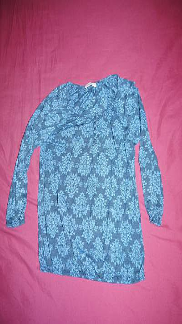

In [99]:
fixed_height=324
for idx, row in selected_df.iterrows():
    img_path = os.path.join("/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear/"+category,row["img"])  # Assumes this column has full image paths

    try:
        image = Image.open(img_path)
        
        height_percent = (fixed_height / float(image.size[1]))
        width_size = int((float(image.size[0]) * float(height_percent)))
        image = image.resize((width_size, fixed_height), Image.NEAREST)
        print(idx, row["subcategory"],row["fit"], row["length"], row["sleeves"], row["hood"], row["neck"], row["fastener"], row["material"], row["design"], row["front_opening"])
        display(image)
    except Exception as e:
        print(f"Error opening {img_path}: {e}")

In [105]:
saved_df = pd.read_csv("fashion-clip.csv")
combined_df = pd.concat([saved_df, df])
combined_df["img"] = combined_df["img"].apply(os.path.basename)
combined_df.to_csv("fashion-clip.csv", index=False)

In [109]:
move_df = df[(df["category"] == "Knits & Hoodies")]
pathes = move_df["img"].tolist()
pathes

['/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear_not_in_db/Knits & Hoodies/b7869275-b3e7-4af3-a86c-871e1c044866.jpg',
 '/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear_not_in_db/Knits & Hoodies/a930e7cd-a242-4d73-861a-ecc3e4bf8aac.jpg',
 '/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear_not_in_db/Knits & Hoodies/hoodie_jaket_branded_uniqlo_a__1697083596_3474c8b4_progressive_thumbnail.jpg',
 '/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear_not_in_db/Knits & Hoodies/hoodie_mlb_aop_1696948634_2ec2df93_progressive_thumbnail.jpg',
 '/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear_not_in_db/Knits & Hoodies/427d9739-ea21-4885-b9c2-31ccde4af5f0.jpg',
 '/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear_not_in_db/Knits & Hoodies/cafa5744-0273-438b-8a52-cb294c13ac42.jpg',
 '/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwea

In [110]:
import shutil
# old_folder = "/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear/Shirts & Blouses"
new_folder = "/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear/Knits & Hoodies"
for old_path in pathes:
    filename = os.path.basename(old_path)                     # just the file name
    new_path = os.path.join(new_folder, filename)
    # print(new_path)             # build new path
    # old = os.path.join(old_folder, filename)
    shutil.move(old_path, new_path)                           # move file
